This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

In [2]:
data = pd.read_csv("archivecluster/CC General.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.dropna(inplace=True)
data.shape

(8636, 18)

In [7]:
list(data.columns)

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [8]:
data.drop(columns="CUST_ID", inplace = True)

<Figure size 432x288 with 0 Axes>

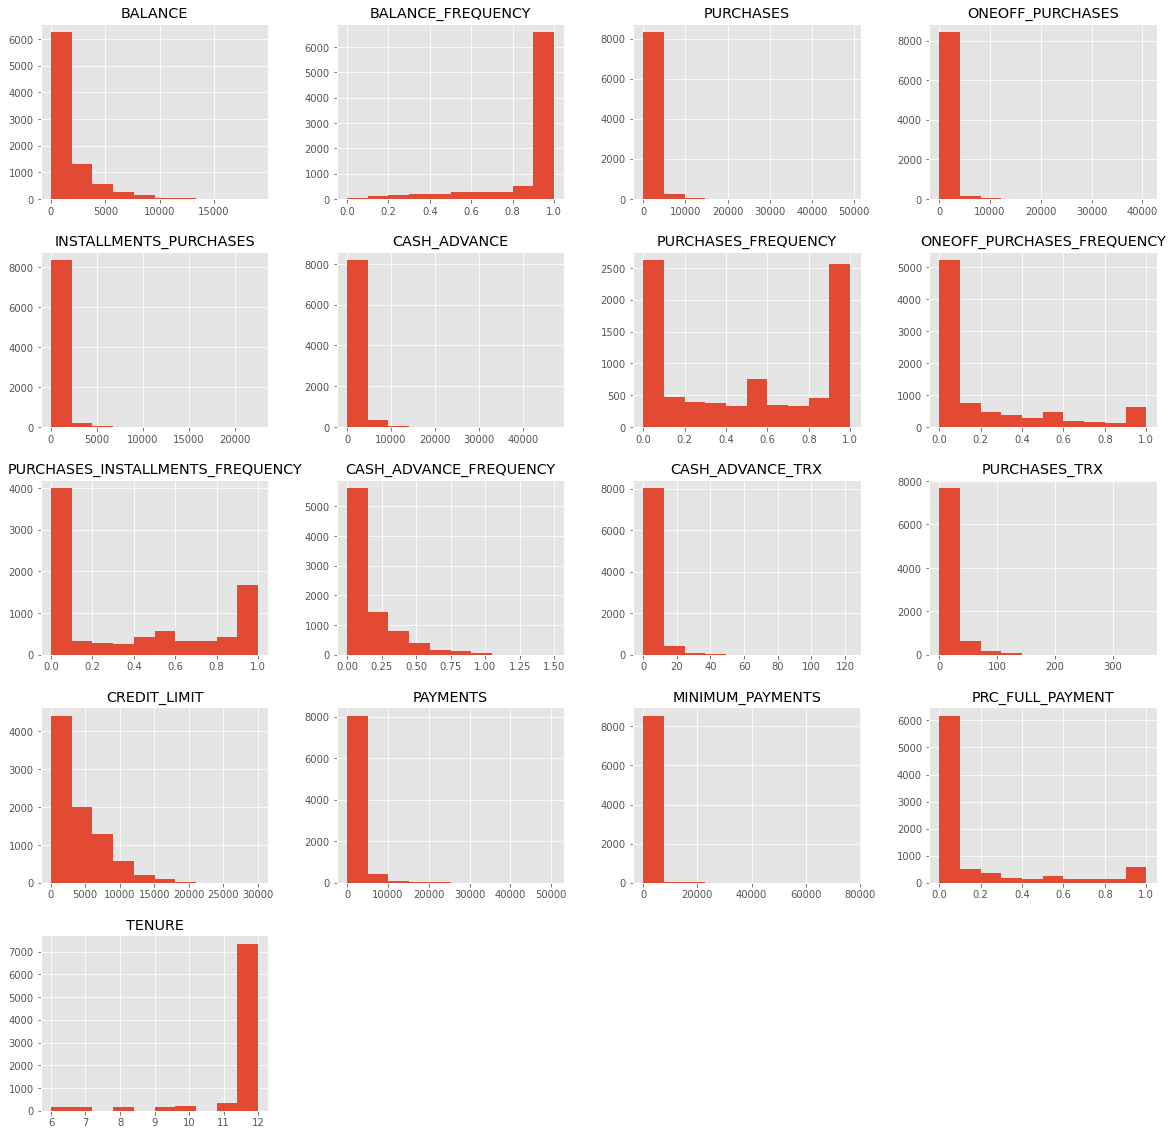

In [9]:
plt.figure()
data.hist(figsize=(20, 20))
plt.show()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, Normalizer

In [11]:
cluster_range = [i for i in range(2, 15)]
inertia = []

In [12]:
nm = Normalizer()
norm_data = nm.fit_transform(data)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=9)
pca_datas = pca.fit_transform(norm_data)

In [15]:
norm_data = pd.DataFrame(norm_data, columns=data.columns)

In [17]:
inertia = []
scores = []
for c in cluster_range:
    km = KMeans(init="k-means++", n_init=10, n_clusters=c).fit(norm_data)
    inertia.append(km.inertia_)
    labels = km.predict(norm_data)
    score = silhouette_score(norm_data, labels)
    scores.append(score)

In [18]:
for a, b in zip(cluster_range, scores):
    print(str(a) + " " + str(b))

2 0.29788023201766217
3 0.32440919970081067
4 0.34708011241581926
5 0.3644678876701922
6 0.3626939291790678
7 0.3253157266280379
8 0.30776154860980476
9 0.3530581050570588
10 0.34993653094811017
11 0.3228359517420393
12 0.30956524543585484
13 0.2929995695006879
14 0.29506196518681804


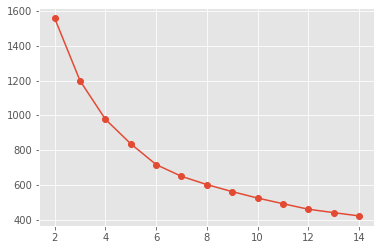

In [19]:
plt.figure()
plt.plot(cluster_range, inertia, marker='o')
plt.show()

so 5 is our best Value for number if clusters

In [20]:
km = KMeans(init="k-means++", n_clusters = 5)
labels = km.fit_predict(norm_data)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(norm_data)

In [23]:
pca_data.shape

(8636, 3)

In [24]:
labels

array([2, 3, 2, ..., 2, 2, 0], dtype=int32)

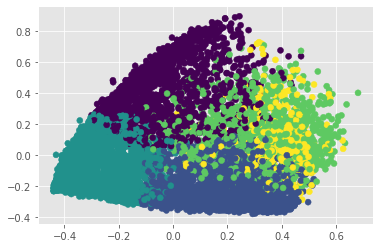

In [25]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)
plt.show()

/var/folders/d2/wgxxszx906b7t2gtw6f995rc0000gn/T/ipykernel_4563/2675876959.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


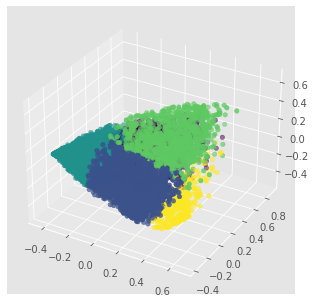

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=labels)
plt.show()

/var/folders/d2/wgxxszx906b7t2gtw6f995rc0000gn/T/ipykernel_4563/2140503680.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


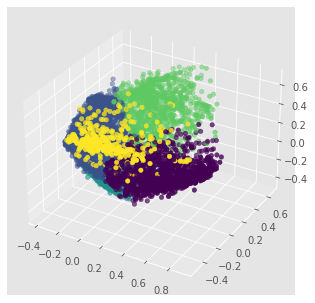

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_data[:,1], pca_data[:,2], pca_data[:,0], c=labels)
plt.show()

/var/folders/d2/wgxxszx906b7t2gtw6f995rc0000gn/T/ipykernel_4563/3200450247.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


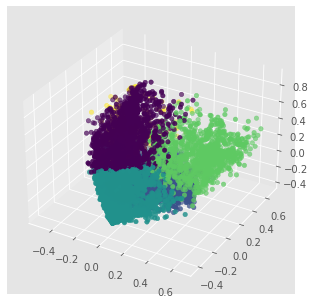

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_data[:,2], pca_data[:,0], pca_data[:,1], c=labels)
plt.show()

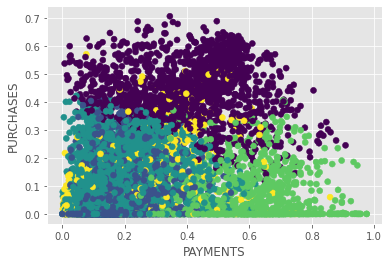

In [29]:
plt.scatter(norm_data["PAYMENTS"], norm_data["PURCHASES"], c=labels)
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.show()

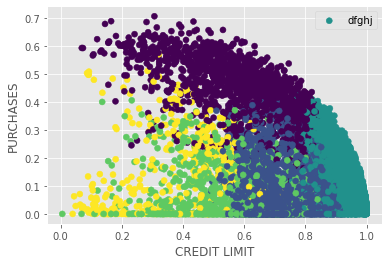

In [30]:
fig = plt.figure()
plt.scatter(norm_data["CREDIT_LIMIT"], norm_data["PURCHASES"], c=labels)
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASES')
plt.legend(["dfghj","fghj"], loc="best")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(norm_data["CREDIT_LIMIT"], norm_data["PURCHASES"], c=labels)
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASES')
plt.legend(["dfghj","fghj"], loc="best")
plt.show()

from the charts above the people with more credit card payments have low credit limit, and vice versa